### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [101]:
tf.__version__

'1.14.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [104]:
print(trainY)

[9 0 0 ... 3 0 5]


In [105]:
print(testX.shape)
print(trainX.shape)

(10000, 28, 28)
(60000, 28, 28)


In [106]:
print(trainY.shape)
print(testY.shape)

(60000,)
(10000,)


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
# Convert labels to One Hot Encoded
#Taking 10 as there are numbers from 0-9
trainY = keras.utils.to_categorical(trainY, 10)
testY = keras.utils.to_categorical(testY, 10)

In [108]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

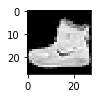

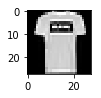

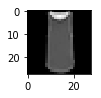

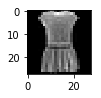

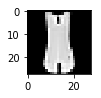

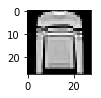

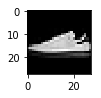

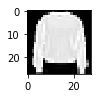

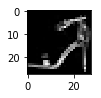

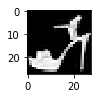

In [109]:
import numpy as np
def gen_image(arrx):
    pyplot.subplot(330 + 1)
    plt.imshow(arrx,cmap=pyplot.get_cmap('gray'))
    #plt.title(arry)
    return plt

for i in range(10):
 gen_image(trainX[i]).show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [112]:
#Feature Normalization 
trainX=trainX.reshape(trainX.shape[0],28,28,1).astype('float32')
testX=testX.reshape(testX.shape[0],28,28,1).astype('float32')
print(trainX.shape)
print(testX.shape)
trainX/=255
testX/=255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Flatten, InputLayer
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

### Execute the model using model.fit()

In [140]:
model.fit(trainX,trainY,batch_size=200,nb_epoch=5,verbose=1,validation_data=(testX,testY))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 25s 423us/step - loss: 2.3026 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 25s 413us/step - loss: 2.3026 - acc: 0.0960 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 25s 412us/step - loss: 2.3026 - acc: 0.0968 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 25s 413us/step - loss: 2.3026 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 25s 414us/step - loss: 2.3026 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000


In [191]:
model.fit(testX,testY,batch_size=200,nb_epoch=5,verbose=1)
score=model.evaluate(testX,testY)
print(score)

Epoch 1/5
  400/10000 [>.............................] - ETA: 3s - loss: 2.3026 - acc: 0.1150

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


10000/10000 [==============================] - 4s 398us/step - loss: 2.3026 - acc: 0.0958
Epoch 2/5
10000/10000 [==============================] - 4s 397us/step - loss: 2.3026 - acc: 0.0932
Epoch 3/5
10000/10000 [==============================] - 4s 397us/step - loss: 2.3026 - acc: 0.0931
Epoch 4/5
10000/10000 [==============================] - 4s 399us/step - loss: 2.3026 - acc: 0.0921
Epoch 5/5
10000/10000 [==============================] - 2s 205us/step
[2.3025851276397704, 0.1]


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD

clf = Sequential()
clf.add(InputLayer(input_shape=(28, 28,1)))

# Normalize the activations of the previous layer at each batch.
clf.add(BatchNormalization())

# Next step is to add convolution layer to model.
clf.add(Conv2D(   32, (2, 2),     padding='same', kernel_initializer='random_uniform' ))

# Add max pooling layer for 2D data.
clf.add(MaxPooling2D(padding='same'))
# Add this same two layers to model.
clf.add(  Conv2D(     32,      (2, 2),   padding='same',       kernel_initializer='random_uniform',      input_shape=(28, 28,1)   ))

clf.add(MaxPooling2D(padding='same'))
clf.add(Flatten())

# Last step is creation of fully-connected layers.
clf.add( Dense(   128,       activation='relu',     kernel_initializer='random_uniform',         ))

# Add output layer, which contains ten numbers.
# Each number represents cloth type.
clf.add(Dense(10, activation='softmax'))


# Last step in Keras is to compile model.
clf.compile(  loss='categorical_crossentropy',  optimizer='sgd',   metrics=['accuracy'])


### Execute the model

In [171]:
clf.fit(trainX,trainY,batch_size=200,nb_epoch=5,verbose=1,validation_data=(testX,testY))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 39s 656us/step - loss: 2.3026 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 38s 632us/step - loss: 2.3026 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 38s 630us/step - loss: 2.3026 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 38s 630us/step - loss: 2.3026 - acc: 0.0998 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 38s 630us/step - loss: 2.3026 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000


In [190]:
clf.fit(testX,testY,batch_size=200,nb_epoch=5,verbose=1)
score=clf.evaluate(testX,testY)
print(score)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/5
10000/10000 [==============================] - 7s 735us/step - loss: 2.3029 - acc: 0.0985
Epoch 2/5
10000/10000 [==============================] - 6s 603us/step - loss: 2.3029 - acc: 0.0971
Epoch 3/5
10000/10000 [==============================] - 6s 606us/step - loss: 2.3029 - acc: 0.1000
Epoch 4/5
10000/10000 [==============================] - 6s 601us/step - loss: 2.3029 - acc: 0.0963
Epoch 5/5
10000/10000 [==============================] - 3s 319us/step
[2.30260562210083, 0.1]


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
clf1 = Sequential()
clf1.add(InputLayer(input_shape=(28, 28,1)))

# Normalize the activations of the previous layer at each batch.
clf1.add(BatchNormalization())

# Next step is to add convolution layer to model.
clf1.add(Conv2D(   32, (2, 2),     padding='same', kernel_initializer='random_uniform' )
       )
# Add max pooling layer for 2D data.
clf1.add(MaxPooling2D(padding='same'))
# Add this same two layers to model.
clf1.add(  Conv2D(     32,      (2, 2),       padding='same',       kernel_initializer='random_uniform',      input_shape=(28, 28,1)   ))

clf1.add(MaxPooling2D(padding='same'))
clf1.add(Flatten())

# Last step is creation of fully-connected layers.
clf1.add( Dense(   128,       activation='relu',     kernel_initializer='random_uniform',         ))

# Add output layer, which contains ten numbers.
# Each number represents cloth type.
clf1.add(Dense(10, activation='softmax'))

#optimize sgd to learning rate to 0.001
opt = SGD(lr=0.001, momentum=0.9)

# Last step in Keras is to compile model.
clf1.compile(  loss='categorical_crossentropy',  optimizer= opt,   metrics=['accuracy'])

In [180]:
clf1.fit(trainX,trainY,batch_size=200,nb_epoch=5,verbose=1,validation_data=(testX,testY))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 39s 657us/step - loss: 2.3026 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 38s 630us/step - loss: 2.3026 - acc: 0.0975 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 38s 629us/step - loss: 2.3026 - acc: 0.0974 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 38s 629us/step - loss: 2.3026 - acc: 0.0995 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 38s 631us/step - loss: 2.3026 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000


In [189]:
clf1.fit(testX,testY,batch_size=200,nb_epoch=5,verbose=1)
score=clf1.evaluate(testX,testY)
print(score)

Epoch 1/5
  200/10000 [..............................] - ETA: 6s - loss: 2.3026 - acc: 0.0900

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


10000/10000 [==============================] - 6s 556us/step - loss: 2.3026 - acc: 0.0955
Epoch 2/5
10000/10000 [==============================] - 6s 597us/step - loss: 2.3026 - acc: 0.0966
Epoch 3/5
10000/10000 [==============================] - 6s 591us/step - loss: 2.3026 - acc: 0.0979
Epoch 4/5
10000/10000 [==============================] - 6s 588us/step - loss: 2.3026 - acc: 0.0975
Epoch 5/5
10000/10000 [==============================] - 3s 267us/step
[2.3025853347778322, 0.1]


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
clf2 = Sequential()
clf2.add(InputLayer(input_shape=(28, 28,1)))

# Normalize the activations of the previous layer at each batch.
clf2.add(BatchNormalization())

# Next step is to add convolution layer to model.
clf2.add(Conv2D(   32, (2, 2),     padding='same', kernel_initializer='random_uniform' )
       )
# Add max pooling layer for 2D data.
clf2.add(MaxPooling2D(padding='same'))
# Add this same two layers to model.
clf2.add(  Conv2D(     32,      (2, 2),       padding='same',       kernel_initializer='random_uniform',      input_shape=(28, 28,1)   ))

clf2.add(MaxPooling2D(padding='same'))
clf2.add(Flatten())

# Last step is creation of fully-connected layers. dense layer 1 
clf2.add( Dense(   100,       activation='sigmoid',     kernel_initializer='random_uniform',         ))

#dense layer 2
clf2.add( Dense(   100,       activation='sigmoid',     kernel_initializer='random_uniform',         ))

# Add output layer, which contains ten numbers.
# Each number represents cloth type.
clf2.add(Dense(10, activation='softmax'))

#optimize sgd to learning rate to 0.03
opt = SGD(lr=0.03, momentum=0.9)

# Last step in Keras is to compile model.
clf2.compile(  loss='categorical_crossentropy',  optimizer= opt,   metrics=['accuracy'])

## Review model

In [185]:
clf2.fit(trainX,trainY,batch_size=200,nb_epoch=5,verbose=1,validation_data=(testX,testY))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 40s 662us/step - loss: 2.3154 - acc: 0.1002 - val_loss: 2.3090 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 38s 633us/step - loss: 2.3097 - acc: 0.0999 - val_loss: 2.3050 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 38s 631us/step - loss: 2.3082 - acc: 0.1027 - val_loss: 2.3096 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 38s 632us/step - loss: 2.3075 - acc: 0.0990 - val_loss: 2.3128 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 38s 635us/step - loss: 2.3070 - acc: 0.1014 - val_loss: 2.3054 - val_acc: 0.1000


### Run the model

In [187]:
clf2.fit(testX,testY,batch_size=200,nb_epoch=5,verbose=1)

Epoch 1/5
  200/10000 [..............................] - ETA: 6s - loss: 2.3028 - acc: 0.1300

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


10000/10000 [==============================] - 6s 596us/step - loss: 2.3054 - acc: 0.0986
Epoch 2/5
10000/10000 [==============================] - 6s 595us/step - loss: 2.3054 - acc: 0.0996
Epoch 3/5
10000/10000 [==============================] - 6s 596us/step - loss: 2.3055 - acc: 0.0980
Epoch 4/5
10000/10000 [==============================] - 6s 596us/step - loss: 2.3063 - acc: 0.0954
Epoch 5/5
10000/10000 [==============================] - 6s 598us/step - loss: 2.3043 - acc: 0.1006


In [188]:
score=clf2.evaluate(testX,testY)
print(score)

10000/10000 [==============================] - 3s 292us/step
[2.303945558166504, 0.1]
